---
title: # Titanic Wrangling
author: Sneha Narayanan
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
theme: "Lumen"

---

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [4]:
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head(10)

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,S,United States,348122.0,7.1300,1
6,"Abelson, Mr. Samuel",male,30.0,2nd,C,France,3381.0,24.0000,0
7,"Abelson, Mrs. Hannah",female,28.0,2nd,C,France,3381.0,24.0000,1
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.0,3rd,C,Lebanon,2699.0,18.1509,1
9,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,3rd,S,Finland,3101284.0,7.1806,1


In [5]:
df_titanic.loc[(df_titanic["age"] < 20) & (df_titanic["gender"] == "male") & (df_titanic["survived"] == 1),'name']

13                    Aks, Master. Frank Philip
22               Allison, Master. Hudson Trevor
58            Asplund, Master. Edvin Rojj Felix
62                   Asplund, Mr. Johan Charles
104                  Becker, Master. Richard F.
183               Caldwell, Master. Alden Gates
206         Carter, Master. William Thornton II
244                          Cohen, Mr. Gurshon
274              Coutts, Master. Neville Leslie
275                Coutts, Master. William Loch
304              Davies, Master. John Morgan jr
315                  Dean, Master. Bertram Vere
338                   Dodge, Master. Washington
344                  Dorking, Mr. Edward Arthur
353               Drew, Master. Marshall Brines
457       Goldsmith, Master. Frank John William
491     Hämäläinen, Master. Viljo Unto Johannes
613             Johnson, Master. Harold Theodor
761               Mallet, Master. André Clement
764                     Māmā, Mr. Hannā Mikā'īl
782                McCormack, Mr. Thomas

In [6]:
correlation = df_titanic['age'].corr(df_titanic['fare'])
correlation

0.18406200950561366

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [7]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger
...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN


In [8]:
df_passenger = df_titanic[df_titanic['type']=='passenger']
df_passenger

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1,passenger
...,...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0,passenger
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0,passenger
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0,passenger
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1,passenger


In [9]:
emb_class_df=pd.crosstab(df_passenger["class"], df_passenger["embarked"])
emb_class_df

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [10]:
class_given_embarked = emb_class_df.div(emb_class_df.sum(axis=0), axis=1)
class_given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [11]:
embarked_given_class = emb_class_df.div(emb_class_df.sum(axis=1), axis=0)
embarked_given_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


> What proportion of 3rd class passengers embarked at Southampton?

In [12]:
third_class_S = class_given_embarked.loc['3rd','S']
third_class_S

0.5404814004376368

>What proportion of Southampton passengers were in 3rd class?

In [13]:
S_3rd_class= embarked_given_class.loc['3rd','S']
S_3rd_class

0.6967559943582511

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

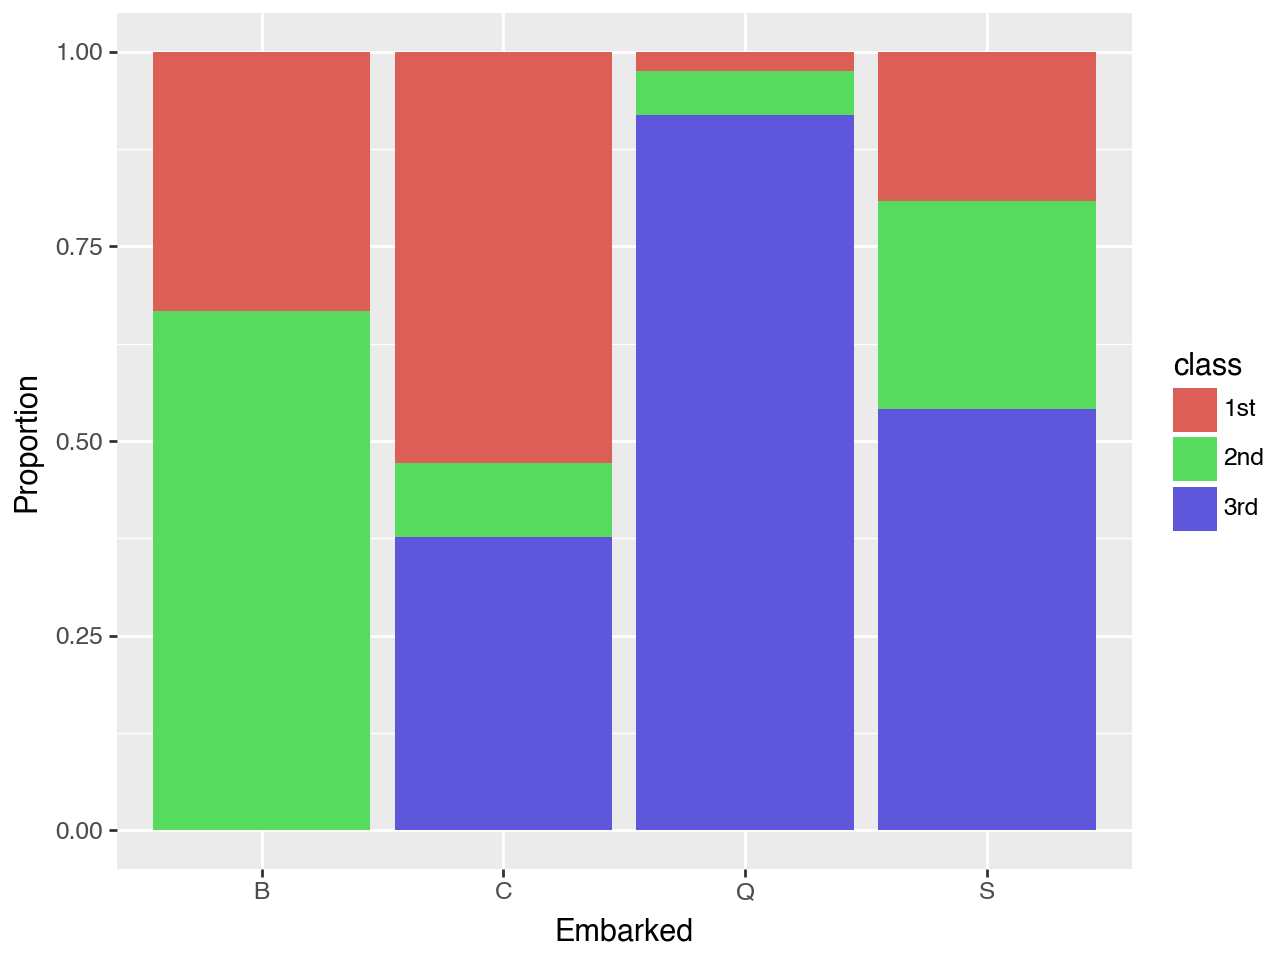

In [21]:
(ggplot(class_given_embarked_melted, aes('Embarked', 'Proportion', fill='class'))
 + geom_col())

### PROS AND CONS OF VISUALIZATION

PRO:
    
    > Quick visual comparison of class proportions across embarkation locations.
    
    > Easier to see relative sizes of each class at a glance.


CON:
    
    > It can be difficult to extract precise values from the visualization.
    
    > The chart may become cluttered with too many categories, hindering clarity in more complex datasets.